**BAR CHARTS**

***

***

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext pycodestyle_magic

In [3]:
%pycodestyle_on

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)

***

***

# Simple bar chart

## Plot function

In [5]:
def simple_bar_plot(data_x, data_y,
                    x_axis_label=r'x axis label',
                    y_axis_label=r'y axis label',
                    plt_name='simple_bar_plot',
                    fig_size=(9, 5)):

    # Barplot.
    fig, ax = plt.subplots(figsize=fig_size)

    # Set bar width.
    barWidth = 0.4

    # Set y values.
    y = data_y

    # Set position of bar on X axis.
    x_pos = np.arange(len(y))

    # Make the plot.
    plt.bar(x_pos,
            y,
            width=barWidth,
            zorder=3,
            color='#005f8a',
            edgecolor='black',
            linewidth=.25,
            label=r'')

    plt.ylim(0, np.max(y) + np.max(y) * 0.1)

    # Add the numbers on top of each bar.
    for x in range(len(x_pos)):
        plt.text(x=x,
                 y=y[x],
                 s=r'{}'.format(y[x]),
                 ha='center',
                 va='bottom',
                 fontsize=13)

    # Add xticks on the middle of the group bars.
    plt.xticks([r for r in range(len(data_x))], data_x)

    # Set grid.
    # plt.grid(axis='y',
    #          color='gainsboro',
    #          linestyle='-',
    #          linewidth=0.2,
    #          zorder=0)

    # Remaining options.
    plt.xlabel(x_axis_label, labelpad=15, fontsize=17)
    plt.ylabel(y_axis_label, labelpad=15, fontsize=17)

    # Adjust margins.
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(left=0.15)

    # Adjust X ticks.
    # fig.autofmt_xdate()

    # Plot.
    plt.show()

    # Save resulting figure in two formats.
    fig.savefig(f'figures/{plt_name}.png',
                bbox_inches='tight')
    fig.savefig(f'figures/{plt_name}.pdf',
                bbox_inches='tight')

## Example

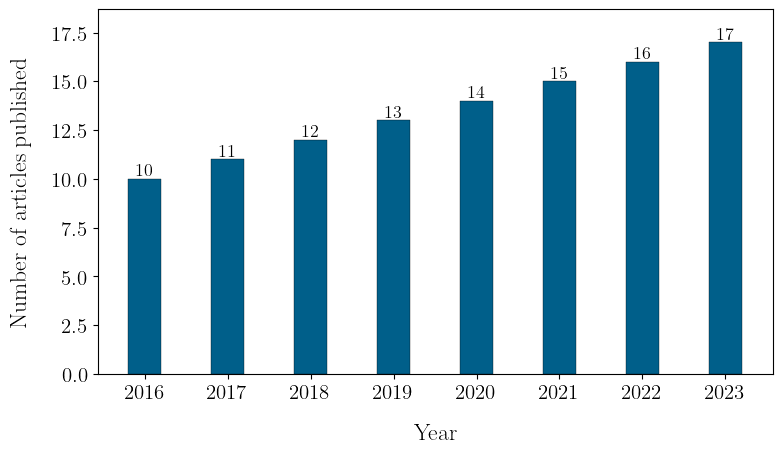

In [6]:
data_x = [2016 + x for x in range(0, 8)]
data_y = [x for x in range(10, 18)]
fig_size = (9, 5)

simple_bar_plot(
    data_x,
    data_y,
    'Year',
    'Number of articles published',
    '01-fl-articles',
    fig_size
)

(intitle:"federated learning"), not including citations

***

***

# Bar chart with two columns with shared y axis

In [7]:
def double_bar_plot_shared_axis(data_x, data_y1, data_y2,
                                x_axis_label=r'x axis label',
                                y_axis_label=r'y1 axis label',
                                y1_label='y1 data label',
                                y2_label='y2 data label',
                                plt_name='double_bar_plot_shareed_axis',
                                fig_size=(12, 5)):

    # Figure.
    # fig = plt.figure(figsize=fig_size)  # Create matplotlib figure
    # ax = fig.add_subplot(111)  # Create matplotlib axes

    # Barplot.
    fig, ax = plt.subplots(figsize=fig_size)

    # Create another axes that shares the same x-axis as ax.
    # ax2 = ax.twinx()

    # Data.
    v1 = data_y1
    v2 = data_y2

    # Position of bar on X axis.
    barWidth = 0.42
    r1 = np.arange(len(v1))
    r2 = [x + barWidth for x in r1]

    # Bars.
    ax.bar(r1,
           v1,
           width=barWidth,
           color='#005f8a',
           edgecolor='black',
           linewidth=.1,
           label=r'{}'.format(y1_label),
           zorder=3)

    ax.set_ylabel(y_axis_label, labelpad=15, fontsize=17)
    max_y_value = np.maximum(v1, v2)
    ax.set_ylim(0, np.max(max_y_value) + np.max(max_y_value) * 0.1)

    ax.bar(r2,
           v2,
           width=barWidth,
           color='#ffa600',
           edgecolor='black',
           linewidth=.1,
           label=r'{}'.format(y2_label),
           zorder=3)

    # Annotations.
    for bar in ax.patches:

        # Using Matplotlib's annotate function and
        # passing the coordinates where the annotation shall be done
        # x-coordinate: bar.get_x() + bar.get_width() / 2
        # y-coordinate: bar.get_height()
        # free space to be left to make graph pleasing: (0, 8)
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center',
                    size=13, xytext=(0, 8),
                    textcoords='offset points')

    # Set X ticks and label.
    plt.xticks([r + barWidth - barWidth/2 for r in range(len(v1))],
               data_x)
    ax.set_xlabel(x_axis_label, labelpad=15, fontsize=17)

    # Legend.
    handles, labels = [], []
    for ax in fig.axes:
        for h, l in zip(*ax.get_legend_handles_labels()):
            handles.append(h)
            labels.append(l)

    plt.legend(handles, labels)

    # Set grid.
    # plt.grid(axis='y',
    #          color='gainsboro',
    #          linestyle='-',
    #          linewidth=0.2,
    #          zorder=0)

    # Margins.
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(left=0.15)

    # Adjust X ticks.
    # fig.autofmt_xdate()

    # Plot.
    plt.show()

    # Save resulting figure in two formats.
    fig.savefig(f'figures/{plt_name}.png',
                bbox_inches='tight')
    fig.savefig(f'figures/{plt_name}.pdf',
                bbox_inches='tight')

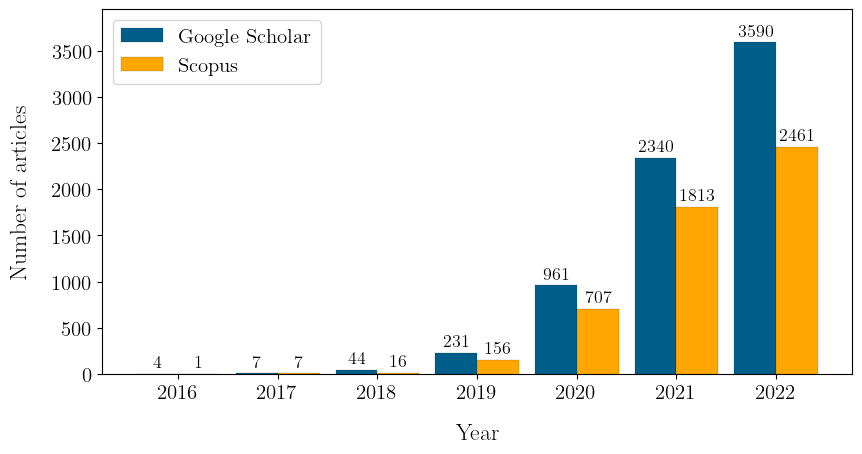

In [8]:
data_x = [2016 + x for x in range(0, 7)]
data_scholar = [4, 7, 44, 231, 961, 2340, 3590]
data_scopus = [1, 7, 16, 156, 707, 1813, 2461]
fig_size = (10, 5)

double_bar_plot_shared_axis(
    data_x,
    data_scholar,
    data_scopus,
    x_axis_label='Year',
    y_axis_label='Number of articles',
    y1_label='Google Scholar',
    y2_label='Scopus',
    plt_name='02-fl-articles',
    fig_size=fig_size
)

***

***

# Bar chart with two columns without shared y axis

In [9]:
def double_bar_plot_no_shared_axis(data_x, data_y1, data_y2,
                                   x_axis_label=r'x axis label',
                                   y1_axis_label=r'y1 axis label',
                                   y2_axis_label=r'y2 axis label',
                                   y1_label='y1 data label',
                                   y2_label='y2 data label',
                                   plt_name='double_bar_plot_no_shared_axis',
                                   fig_size=(12, 5)):

    # Figure.
    # fig = plt.figure(figsize=fig_size)  # Create matplotlib figure
    # ax = fig.add_subplot(111)  # Create matplotlib axes

    # Barplot.
    fig, ax = plt.subplots(figsize=fig_size)

    # Create another axes that shares the same x-axis as ax.
    ax2 = ax.twinx()

    # Data.
    v1 = data_y1
    v2 = data_y2

    # Position of bar on X axis.
    barWidth = 0.4
    r1 = np.arange(len(v1))
    r2 = [x + barWidth for x in r1]

    # Bars.
    ax.bar(r1,
           v1,
           width=barWidth,
           color='#005f8a',
           edgecolor='black',
           linewidth=.25,
           label=r'{}'.format(y1_label),
           zorder=3)

    ax.set_ylabel(y1_axis_label, labelpad=15, fontsize=17)
    ax.set_ylim(0, np.max(v1) + np.max(v1) * 0.1)

    ax2.bar(r2,
            v2,
            width=barWidth,
            color='#ffa600',
            edgecolor='black',
            linewidth=.25,
            label=r'{}'.format(y2_label),
            zorder=3)

    ax2.set_ylabel(y2_axis_label, labelpad=15, fontsize=17)
    ax2.set_ylim(0, np.max(v2) + np.max(v2) * 0.1)

    # Annotations.
    for bar in ax.patches:

        # Using Matplotlib's annotate function and
        # passing the coordinates where the annotation shall be done
        # x-coordinate: bar.get_x() + bar.get_width() / 2
        # y-coordinate: bar.get_height()
        # free space to be left to make graph pleasing: (0, 8)
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center',
                    size=13, xytext=(0, 8),
                    textcoords='offset points')

    for bar in ax2.patches:

        # Using Matplotlib's annotate function and
        # passing the coordinates where the annotation shall be done
        # x-coordinate: bar.get_x() + bar.get_width() / 2
        # y-coordinate: bar.get_height()
        # free space to be left to make graph pleasing: (0, 8)
        # ha and va stand for the horizontal and vertical alignment
        ax2.annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center',
                     size=13, xytext=(0, 8),
                     textcoords='offset points')

    # Set X ticks and label.
    plt.xticks([r + barWidth - barWidth/2 for r in range(len(v1))],
               data_x)
    ax.set_xlabel(x_axis_label, labelpad=15, fontsize=17)

    # Legend.
    handles, labels = [], []
    for ax in fig.axes:
        for h, l in zip(*ax.get_legend_handles_labels()):
            handles.append(h)
            labels.append(l)

    plt.legend(handles, labels)

    # Set grid.
    # plt.grid(axis='y',
    #          color='gainsboro',
    #          linestyle='-',
    #          linewidth=0.2,
    #          zorder=0)

    # Margins.
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(left=0.15)

    # Adjust X ticks.
    # fig.autofmt_xdate()

    # Plot.
    plt.show()

    # Save resulting figure in two formats.
    fig.savefig(f'figures/{plt_name}.png',
                bbox_inches='tight')
    fig.savefig(f'figures/{plt_name}.pdf',
                bbox_inches='tight')

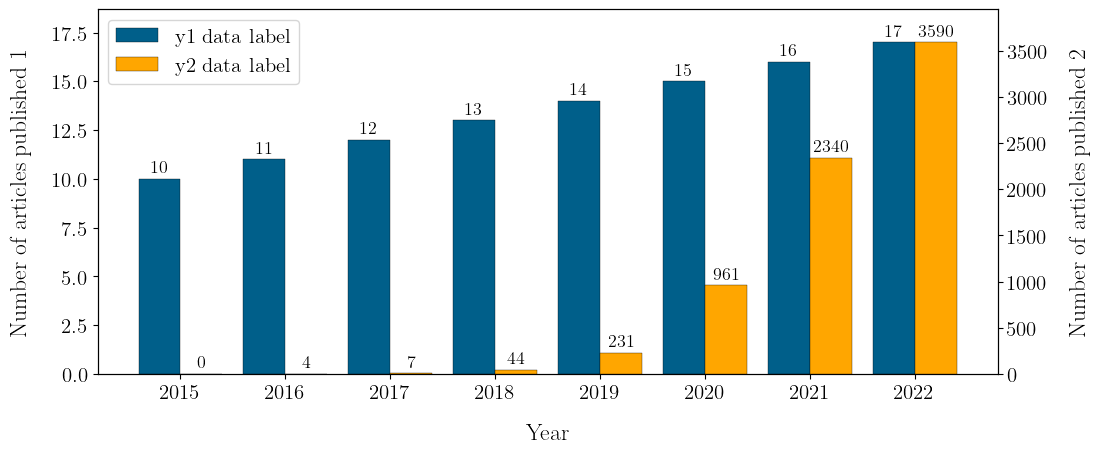

In [10]:
data_x = [2015 + x for x in range(0, 8)]
data_y1 = [x for x in range(10, 18)]
data_y2 = [0, 4, 7, 44, 231, 961, 2340, 3590]
fig_size = (12, 5)

double_bar_plot_no_shared_axis(
    data_x,
    data_y1,
    data_y2,
    x_axis_label='Year',
    y1_axis_label='Number of articles published 1',
    y2_axis_label='Number of articles published 2',
    y1_label='y1 data label',
    y2_label='y2 data label',
    plt_name='03-fl-articles',
    fig_size=fig_size
)

***

***